# Double (or more) Pendulum 

In [1]:
%matplotlib inline
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

# The dpi (dots-per-inch) setting will affect the resolution and how large
#  the plots appear on screen and printed.  So you may want/need to adjust 
#  the figsize when creating the figure.
plt.rcParams['figure.dpi'] = 100.    # this is the default for notebook

# Change the common font size (smaller when higher dpi)
font_size = 12
plt.rcParams.update({'font.size': font_size})

In [50]:
class LagrangianDoublePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations.
     
    Parameters
    ----------
    L1 : float
        length of the pendulum one
    L2 : float
        length of the pendulum two (attached pendulum)
    g : float
        gravitational acceleration at the earth's surface
    mass : float
        mass of pendulum
    """
    def __init__(self, L1=1.,L2=2.,mass1=1., mass2=1., g=1.
                ):
        self.L1 = L1
        self.mass1 = mass1
        self.g = g
        self.mass2 = mass2
        self.L2 = L2
        """
        Methods
        -------
        dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
        """
    def dy_dt(self, t, y):
        """
       This function returns the right-hand side of the diffeq: 
       [dphi/dt d^2phi/dt^2]
       Parameters
       ----------
       t : float, time 
       y : float, A 3-component vector with y[0] = phi1(t), y[1] = dphi1/dt, and y[2] = phi2(t), 
       and y[3]=dphi2(t)/dt
       Returns
       -------
       """
        c2 = mass1 + mass2
        c1 = L1 * L2 * mass2
        c = np.cos(y[0] - y[2])
        s = np.sin(y[0] - y[2])
        return [y[1], (c1**2 * c * s * y[1]**2 + L1 * g * c2 * np.sin(y[0])) - c2 * L1**2 *\
               ((-c1) * y[1]**2 * s + L2 * mass2 * g * np.sin(y[2]))/ (c1**2 * c * c - c2 * L1**2\
                                                                      * (mass2*L2**2)),\
                y[3], mass2*L2**2*c1 * s * y[1]**2 + L1 * g * c2 * np.sin(y[0]) - c1 * c * (-c1)\
                * y[1]**2 * s + L2 * mass2 * g * np.sin(y[2])/ (mass2 * L2**2 * c2 * L1**2 - c1**2 * c**2)]  
    
    def solve_ode(self, t_pts, phi_1, phi_dot_1, phi_2, phi_dot_2,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_1, phi_dot_1, phi_2, phi_dot_2,] 
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        phi_1, phi_dot_1, phi_2, phi_dot_2, = solution.y

        return phi_1, phi_dot_1, phi_2, phi_dot_2,

In [44]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [45]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [52]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
g = 1.
mass1 = 1.
mass2 = 1.

# Instantiate a pendulum 
p1 = LagrangianDoublePendulum(L1=L1, L2=L2, g=g, mass1=mass1, mass2=mass2 )

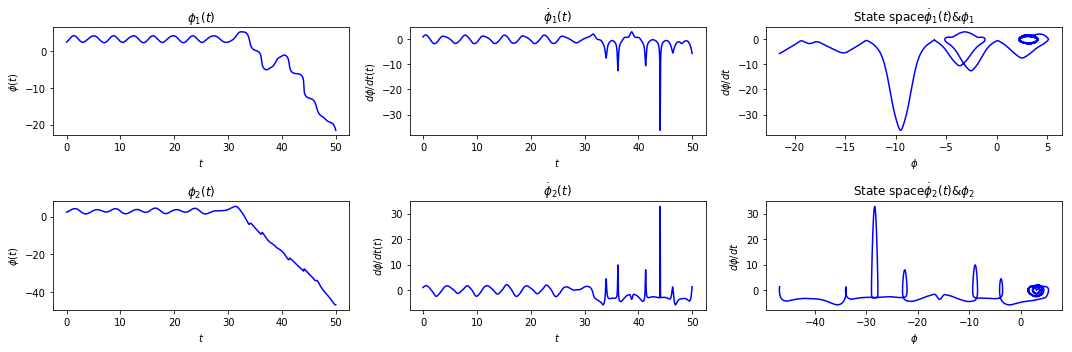

In [53]:
# both plots: same initial conditions
phi_1 = (3./4.)*np.pi
phi_dot_1 = 1.
phi_2 = (3./4.)*np.pi
phi_dot_2 = 1.
phi_1, phi_dot_1, phi_2, phi_dot_2 = p1.solve_ode(t_pts, phi_1, phi_dot_1, phi_2, phi_dot_2)
# start the plot!
fig = plt.figure(figsize=(15,5))  
# first plot: phi_1 plot 
ax_a = fig.add_subplot(2,3,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_1[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_1(t)$', 
            ax=ax_a)    
                              
# second plot: phi_dot_1 plot 
ax_b = fig.add_subplot(2,3,2)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_dot_1[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_1(t)$', 
            ax=ax_b)    

# third plot: state space plot from t=30 to t=50   
ax_c = fig.add_subplot(2,3,3)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title='State space'r'$\dot\phi_1(t) & \phi_1$', 
            ax=ax_c)    

# fourth plot: phi_2 plot 
ax_d = fig.add_subplot(2,3,4)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_2[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\phi_2(t)$', 
            ax=ax_d)    
                              
# fifth plot: phi_dot_2 plot 
ax_e = fig.add_subplot(2,3,5)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], phi_dot_2[start : stop], 
            axis_labels=phi_dot_vs_time_labels, 
            color='blue',
            label=None, 
            title=r'$\dot\phi_2(t)$', 
            ax=ax_e)    

# sixth plot: state space plot from t=30 to t=50   
ax_f = fig.add_subplot(2,3,6)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title='State space'r'$\dot\phi_2(t)&\phi_2$', 
            ax=ax_f)   

fig.tight_layout()
fig.savefig('Double_pendulum_.png', bbox_inches='tight')